# Diabetic Risk Prediction

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### 1) Problem statement
This  diabetic risk identification module using machine learning models to assess individual risk levels based on lifestyle, dietary habits, and activity patterns.

### 2) Data Collection
- Dataset Source - https://drive.google.com/file/d/1jrOQdg4fjLljNFnLxAbMouav4s1WzJxa/view?usp=drive_link
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Import the CSV Data as Pandas DataFrame

In [76]:
df = pd.read_csv('../../data/CommonParameters.csv')

#### Shape of the Dataset

In [77]:
df.shape

(697, 18)

#### Head of the Dataset

In [78]:
df.head()

,id,Age,Gender,Height,Weight,Waist Circumference,Diet / Food Habits,Type of Diabetes (if known),HowLongDiabetiesHave,Family History,Blood Pressure,Cholesterol / Lipid Levels,Thirst / Hunger,Fatigue,Urination,Vision Changes,Occupation,Living Area
0,1,24,Male,167.0,50.0,30.0,2,NaN,NaN,No,No,No,No,No,No,No,Intern,Western
1,2,30,Male,164.0,60.0,32.0,1,NaN,NaN,Yes,No,No,No,No,No,No,Undergraduate,Southern
2,3,24,Male,165.0,55.0,30.0,1,NaN,NaN,Yes,No,No,No,No,No,Yes,Student,Western
3,4,28,Female,153.0,48.0,28.0,5,NaN,NaN,No,No,No,No,No,No,No,Undergraduate,North-Western
4,5,24,Female,163.0,56.0,31.0,4,NaN,NaN,No,Yes,No,No,No,No,Yes,NaN,Central


### 2.2 Dataset information


- gender : sex of students  -> (Male/female)
- Age : -> 30-50
- Height : -> (cm)
- Weight:-> (kg) 
- Waist Circumference: -> (inch)
- Diet / Food Habits :- > How many time 
- Type of Diabetes (if known) : -> Type 1 & Type 2 
- HowLongDiabetiesHave 
- Family History -> Yes/No
- Blood Pressure -> Yes/No
- Cholesterol / Lipid Levels -> Yes/No
- Thirst / Hunger -> Yes/No
- Fatigue -> Yes/No
- Urination -> Yes/No
- Vision Changes -> Yes/No
- Occupation 
- Living Area

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [72]:
df.isna().sum()

id                               0
Age                              0
Gender                           0
Height                           0
Weight                           0
Waist Circumference             49
Diet / Food Habits               0
Type of Diabetes (if known)    491
HowLongDiabetiesHave           509
Family History                   0
Blood Pressure                   0
Cholesterol / Lipid Levels       0
Thirst / Hunger                  0
Fatigue                          0
Urination                        0
Vision Changes                   0
Occupation                       7
Living Area                      0
dtype: int64

In [73]:
binary_columns = ["Family History", "Blood Pressure", "Cholesterol / Lipid Levels",
                  "Thirst / Hunger", "Fatigue", "Urination", "Vision Changes"]
for col in binary_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [74]:
df.duplicated().sum()

0

In [9]:
df.head()

,id,Age,Gender,Height,Weight,Waist Circumference,Diet / Food Habits,Type of Diabetes (if known),HowLongDiabetiesHave,Family History,Blood Pressure,Cholesterol / Lipid Levels,Thirst / Hunger,Fatigue,Urination,Vision Changes,Occupation,Living Area
0,1,24,1,167.0,50.0,30.0,2,NaN,NaN,0,0,0,0,0,0,0,Intern,Western
1,2,30,1,164.0,60.0,32.0,1,NaN,NaN,1,0,0,0,0,0,0,Undergraduate,Southern
2,3,24,1,165.0,55.0,30.0,1,NaN,NaN,1,0,0,0,0,0,1,Student,Western
3,4,28,0,153.0,48.0,28.0,5,NaN,NaN,0,0,0,0,0,0,0,Undergraduate,North-Western
4,5,24,0,163.0,56.0,31.0,4,NaN,NaN,0,1,0,0,0,0,1,NaN,Central


#### There are no duplicates  values in the data set

### 3.3 Check data types


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           697 non-null    int64  
 1   Age                          697 non-null    int64  
 2   Gender                       697 non-null    int64  
 3   Height                       697 non-null    float64
 4   Weight                       697 non-null    float64
 5   Waist Circumference          648 non-null    float64
 6   Diet / Food Habits           697 non-null    int64  
 7   Type of Diabetes (if known)  206 non-null    object 
 8   HowLongDiabetiesHave         188 non-null    object 
 9   Family History               697 non-null    int64  
 10  Blood Pressure               697 non-null    int64  
 11  Cholesterol / Lipid Levels   697 non-null    int64  
 12  Thirst / Hunger              697 non-null    int64  
 13  Fatigue             

### 3.4 Checking the number of unique values of each column


In [39]:
df.nunique()

id                             697
Age                             31
Gender                           2
Height                          58
Weight                          89
Waist Circumference             29
Diet / Food Habits              10
Type of Diabetes (if known)      2
HowLongDiabetiesHave             5
Family History                   2
Blood Pressure                   2
Cholesterol / Lipid Levels       2
Thirst / Hunger                  2
Fatigue                          2
Urination                        2
Vision Changes                   2
Occupation                      87
Living Area                     10
dtype: int64

#### Drop irrelevant Colums

In [ ]:
df.drop(columns=["id", "Type of Diabetes (if known)", "HowLongDiabetiesHave","Occupation","Living Area","Diet / Food Habits"], inplace=True)

In [41]:
df.head()

,Age,Gender,Height,Weight,Waist Circumference,Diet / Food Habits,Family History,Blood Pressure,Cholesterol / Lipid Levels,Thirst / Hunger,Fatigue,Urination,Vision Changes
0,24,1,167.0,50.0,30.0,2,0,0,0,0,0,0,0
1,30,1,164.0,60.0,32.0,1,1,0,0,0,0,0,0
2,24,1,165.0,55.0,30.0,1,1,0,0,0,0,0,1
3,28,0,153.0,48.0,28.0,5,0,0,0,0,0,0,0
4,24,0,163.0,56.0,31.0,4,0,1,0,0,0,0,1


#### Calculate BMI

In [42]:
df["BMI"] = df["Weight"] / (df["Height"] / 100) ** 2
df.head()

,Age,Gender,Height,Weight,Waist Circumference,Diet / Food Habits,Family History,Blood Pressure,Cholesterol / Lipid Levels,Thirst / Hunger,Fatigue,Urination,Vision Changes,BMI
0,24,1,167.0,50.0,30.0,2,0,0,0,0,0,0,0,17.928215
1,30,1,164.0,60.0,32.0,1,1,0,0,0,0,0,0,22.308150
2,24,1,165.0,55.0,30.0,1,1,0,0,0,0,0,1,20.202020
3,28,0,153.0,48.0,28.0,5,0,0,0,0,0,0,0,20.504934
4,24,0,163.0,56.0,31.0,4,0,1,0,0,0,0,1,21.077195


#### Assign Value Score and fullFill missing values


In [43]:
import pandas as pd
df.replace('?', pd.NA, inplace=True)

for col in df:
    if col not in df.columns:
        df[col] = pd.NA  

In [44]:
df.rename(columns={
    'Waist Circumference': 'Waist_Circumference',
    'Blood Pressure': 'Blood_Pressure',
    'Cholesterol / Lipid Levels': 'Cholesterol_Lipid_Levels',
    'Thirst / Hunger': 'Thirst',
    'Family History': 'Family_History'
}, inplace=True)
df.head()

,Age,Gender,Height,Weight,Waist_Circumference,Diet / Food Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI
0,24,1,167.0,50.0,30.0,2,0,0,0,0,0,0,0,17.928215
1,30,1,164.0,60.0,32.0,1,1,0,0,0,0,0,0,22.308150
2,24,1,165.0,55.0,30.0,1,1,0,0,0,0,0,1,20.202020
3,28,0,153.0,48.0,28.0,5,0,0,0,0,0,0,0,20.504934
4,24,0,163.0,56.0,31.0,4,0,1,0,0,0,0,1,21.077195


In [45]:
cols_to_convert = ['Weight', 'Height', 'Age', 'Waist_Circumference', 'Blood_Pressure', 'Cholesterol_Lipid_Levels']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df[cols_to_convert] = df[cols_to_convert].fillna(df[cols_to_convert].mean())

df.head()

,Age,Gender,Height,Weight,Waist_Circumference,Diet / Food Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI
0,24,1,167.0,50.0,30.0,2,0,0,0,0,0,0,0,17.928215
1,30,1,164.0,60.0,32.0,1,1,0,0,0,0,0,0,22.308150
2,24,1,165.0,55.0,30.0,1,1,0,0,0,0,0,1,20.202020
3,28,0,153.0,48.0,28.0,5,0,0,0,0,0,0,0,20.504934
4,24,0,163.0,56.0,31.0,4,0,1,0,0,0,0,1,21.077195


In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert categorical columns ('yes' → 1, 'no' → 0)
categorical_cols = ['Thirst', 'Fatigue', 'Urination', 'Family_History']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0}).fillna(0)

# Ensure data is float type
df = df.astype(float)

# Increased weights for higher risk impact
weights = {
    'BMI': 0.10,  # Strongest impact on obesity
    'Waist_Circumference': 0.5,  # Central obesity impact
    'Blood_Pressure': 0.15,  # Higher BP leads to risk
    'Cholesterol_Lipid_Levels': 0.15,  # Lipid profile impact
    'Age': 0.10,  # Aging as a stronger factor
    'Family_History': 0.5,  # Genetics plays a bigger role
    'Thirst': 0.15,  # Symptoms given more importance
    'Fatigue': 0.15,
    'Urination': 0.10,
    'Vision Changes': 0.10
}

# Ensure all weighted columns exist in df
for col in weights.keys():
    if col not in df.columns:
        df[col] = 0  # Assign default value if missing

# Compute Diabetes Risk Score (weighted sum)
df['DiabetesRisk'] = df[list(weights.keys())].mul(pd.Series(weights, dtype="float64")).sum(axis=1)

# Multiply by a scaling factor to increase scores naturally
df['DiabetesRisk'] *= 275  # Adjust the factor for bigger values

# Apply Min-Max Scaling to keep scores in a large meaningful range
scaler = MinMaxScaler(feature_range=(0, 275))  # Ensure a high score range
df['DiabetesRisk'] = scaler.fit_transform(df[['DiabetesRisk']])

# Display first few rows
print(df[['DiabetesRisk']].head())


   DiabetesRisk
0     30.774236
1     42.784055
2     32.703477
3     28.756909
4     37.049640


In [51]:
df


,Age,Gender,Height,Weight,Waist_Circumference,Diet / Food Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI,DiabetesRisk
0,24.0,1.0,167.0,50.0,30.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.928215,27.976578
1,30.0,1.0,164.0,60.0,32.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.308150,38.894596
2,24.0,1.0,165.0,55.0,30.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.202020,29.730434
3,28.0,0.0,153.0,48.0,28.000000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.504934,26.142645
4,24.0,0.0,163.0,56.0,31.000000,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.077195,33.681491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,42.0,1.0,178.0,85.3,32.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.922106,47.795089
693,27.0,1.0,174.0,70.0,32.000000,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,23.120624,39.061996
694,45.0,1.0,177.0,84.2,35.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.876057,57.413449
695,26.0,1.0,166.3,64.0,34.421296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.141712,43.683990


### Check the data information

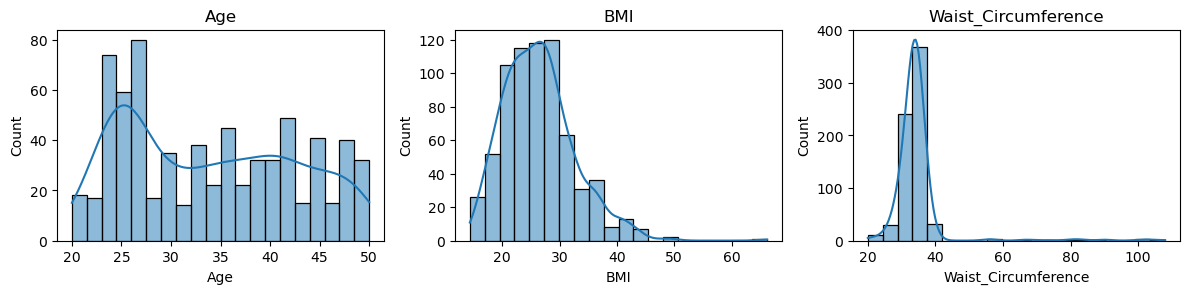

In [57]:
features = ['Age', 'BMI', 'Waist_Circumference']

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(feature)

plt.tight_layout()
plt.show()

### Assign the risk values

In [58]:
def classify_risk(score):
    if score < 30:
        return "Low Risk"
    elif 30 <= score < 70:
        return "Moderate Risk"
    else:
        return "High Risk"

df['RiskLevel'] = df['DiabetesRisk'].apply(classify_risk)
df['RiskLevel'] = df['RiskLevel'].map({'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2})
print(df[['Age', 'BMI', 'Blood_Pressure', 'DiabetesRisk', 'RiskLevel']])


      Age        BMI  Blood_Pressure  DiabetesRisk  RiskLevel
0    24.0  17.928215             0.0     30.774236          1
1    30.0  22.308150             0.0     42.784055          1
2    24.0  20.202020             0.0     32.703477          1
3    28.0  20.504934             0.0     28.756909          0
4    24.0  21.077195             1.0     37.049640          1
..    ...        ...             ...           ...        ...
692  42.0  26.922106             0.0     52.574598          1
693  27.0  23.120624             0.0     42.968195          1
694  45.0  26.876057             0.0     63.154794          1
695  26.0  23.141712             0.0     48.052390          1
696  38.0  26.196187             1.0     60.396964          1

[697 rows x 5 columns]


In [59]:
high_risk_df = df[df['DiabetesRisk'] > 70]  # Adjust threshold if needed
high_risk_count = high_risk_df.shape[0]  # Count of high-risk individuals

print(f"Number of high-risk individuals: {high_risk_count}")

Number of high-risk individuals: 78


In [60]:
print(df)

      Age  Gender  Height  Weight  Waist_Circumference  Diet / Food Habits  \
0    24.0     1.0   167.0    50.0            30.000000                 2.0   
1    30.0     1.0   164.0    60.0            32.000000                 1.0   
2    24.0     1.0   165.0    55.0            30.000000                 1.0   
3    28.0     0.0   153.0    48.0            28.000000                 5.0   
4    24.0     0.0   163.0    56.0            31.000000                 4.0   
..    ...     ...     ...     ...                  ...                 ...   
692  42.0     1.0   178.0    85.3            32.000000                 3.0   
693  27.0     1.0   174.0    70.0            32.000000                 7.0   
694  45.0     1.0   177.0    84.2            35.000000                 6.0   
695  26.0     1.0   166.3    64.0            34.421296                 1.0   
696  38.0     1.0   178.0    83.0            35.000000                 6.0   

     Family_History  Blood_Pressure  Cholesterol_Lipid_Levels  

### Augmented Values(optional)

In [61]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Ensure categorical columns exist before encoding
categorical_cols = ['Thirst / Hunger', 'Fatigue', 'Urination', 'Family History']

# Check available columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

# Apply Label Encoding only to existing columns
for col in existing_categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display updated DataFrame
print(df.head())


    Age  Gender  Height  Weight  Waist_Circumference  Diet / Food Habits  \
0  24.0     1.0   167.0    50.0                 30.0                 2.0   
1  30.0     1.0   164.0    60.0                 32.0                 1.0   
2  24.0     1.0   165.0    55.0                 30.0                 1.0   
3  28.0     0.0   153.0    48.0                 28.0                 5.0   
4  24.0     0.0   163.0    56.0                 31.0                 4.0   

   Family_History  Blood_Pressure  Cholesterol_Lipid_Levels  Thirst  Fatigue  \
0             0.0             0.0                       0.0     0.0        0   
1             0.0             0.0                       0.0     0.0        0   
2             0.0             0.0                       0.0     0.0        0   
3             0.0             0.0                       0.0     0.0        0   
4             0.0             1.0                       0.0     0.0        0   

   Urination  Vision Changes        BMI  DiabetesRisk  RiskLev

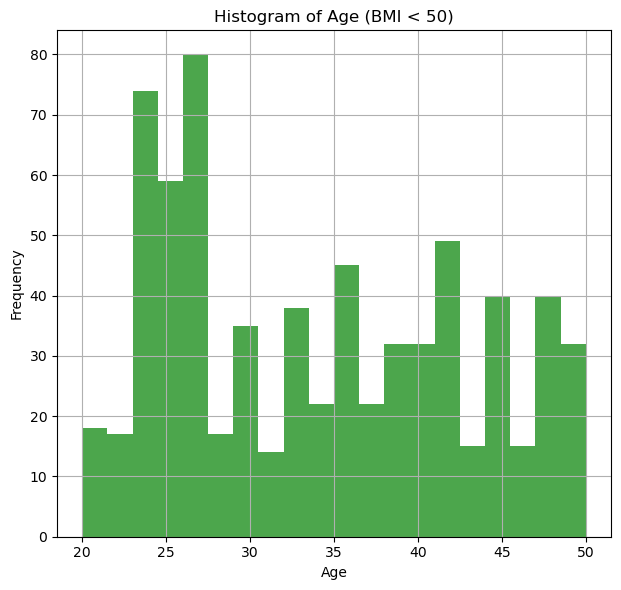

In [62]:
filtered_df = df[df['BMI'] < 50]

# Plot Histograms for Age and Blood Pressure
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
plt.hist(filtered_df['Age'], bins=20, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (BMI < 50)')
plt.grid(True)


plt.tight_layout()
plt.show()

In [63]:
# Separate features and target again
X = df.drop(columns=['DiabetesRisk'])
y = df['DiabetesRisk'] > 70  # Convert risk score into binary (High Risk = 1, Low = 0)

# Apply SMOTE only to 30-50 age group
smote = SMOTE(sampling_strategy={1: int(y.sum() * 1.5)}, random_state=42)  # 1.5x Oversampling for High Risk

# Filter 30-50 Age Group
df_age_30_50 = df[(df['Age'] >= 30) & (df['Age'] < 50)]
X_30_50 = df_age_30_50.drop(columns=['DiabetesRisk'])
y_30_50 = (df_age_30_50['DiabetesRisk'] > 70).astype(int)  # Binary target for SMOTE

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_30_50, y_30_50)

# Convert back to DataFrame
df_augmented_30_50 = pd.DataFrame(X_resampled, columns=X.columns)

# Get risk percentiles for age-based adjustments
low_risk_threshold = np.percentile(df['DiabetesRisk'], 25)
median_risk = np.percentile(df['DiabetesRisk'], 50)
high_risk_threshold = np.percentile(df['DiabetesRisk'], 75)
max_risk = df['DiabetesRisk'].max()

# Generate adjusted risk values
random_risk_values = np.zeros(len(df_augmented_30_50))

for i, age in enumerate(df_augmented_30_50['Age']):
    if 30 <= age < 50:
        random_risk_values[i] = np.random.uniform(median_risk, high_risk_threshold)  # Higher range for 30-50

# Assign adjusted risk values
df_augmented_30_50['DiabetesRisk'] = random_risk_values

# Combine with Original Dataset
df = pd.concat([df, df_augmented_30_50], ignore_index=True)

print("Data Augmentation Successful! New dataset size:", df.shape)
print("Augmented Data for Age 30-50 Group:", df_augmented_30_50.shape)


Data Augmentation Successful! New dataset size: (1157, 16)
Augmented Data for Age 30-50 Group: (460, 16)


In [67]:
df.head()

,Age,Gender,Height,Weight,Waist_Circumference,Diet / Food Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI,DiabetesRisk,RiskLevel
0,24.0,1.0,167.0,50.0,30.0,2.0,0.0,0.0,0.0,0.0,0,0,0.0,17.928215,30.774236,1
1,30.0,1.0,164.0,60.0,32.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,22.308150,42.784055,1
2,24.0,1.0,165.0,55.0,30.0,1.0,0.0,0.0,0.0,0.0,0,0,1.0,20.202020,32.703477,1
3,28.0,0.0,153.0,48.0,28.0,5.0,0.0,0.0,0.0,0.0,0,0,0.0,20.504934,28.756909,0
4,24.0,0.0,163.0,56.0,31.0,4.0,0.0,1.0,0.0,0.0,0,0,1.0,21.077195,37.049640,1


In [66]:
df.to_csv("../../data/preproccedData/Augmented_PreProccedCommonParameters.csv", index=False)

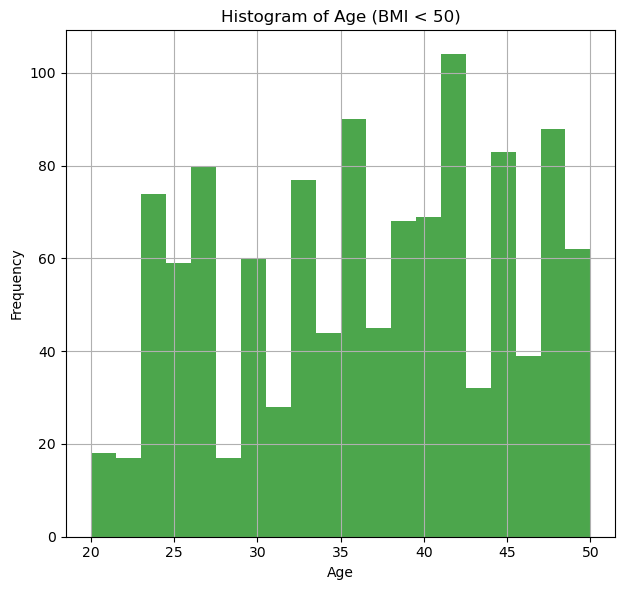

In [64]:
filtered_df = df[df['BMI'] < 50]

# Plot Histograms for Age and Blood Pressure
plt.figure(figsize=(12, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
plt.hist(filtered_df['Age'], bins=20, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (BMI < 50)')
plt.grid(True)


plt.tight_layout()
plt.show()

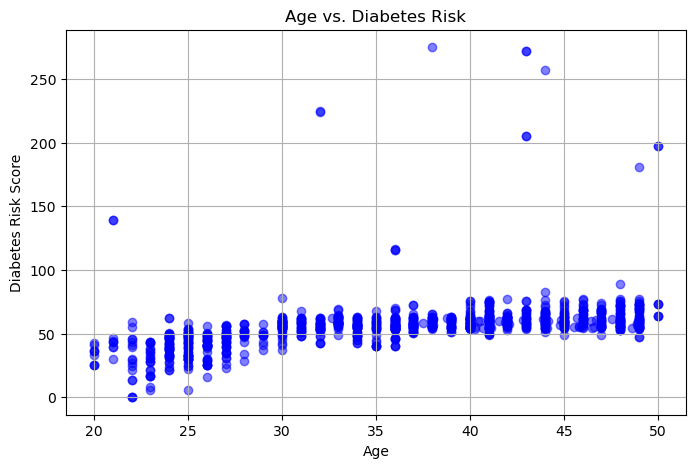

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['DiabetesRisk'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Diabetes Risk Score')
plt.title('Age vs. Diabetes Risk')
plt.grid(True)
plt.show()